# **4.5 유용한 특성 선택**

**과대적합(overfitting)**<br>
- 모델이 테스트 데이터셋보다 훈련 데이터셋에서 성능이 높은 경우 과대적합 가능성이 높다.
- 훈련 데이터에 비해 모델이 복잡해서 발생한다.
- 모델 파라미터가 훈련 데이터셋에 있는 특정 샘플들에 대해 너무 가깝게 맞추어져 있다는 의미
- 분산이 커서 새로운 데이터에 잘 일반화하지 못한다.

<br>

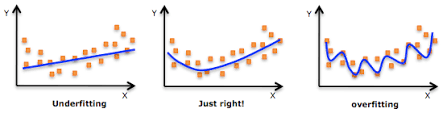


과대적합을 **방지**하기 위한 방법
- **더 많은** 훈련 데이터 확보
- 규제를 통한 **복잡도 제한**
- 파라미터 개수가 적은 **간단한 모델 선택**
- 데이터 **차원 줄이기**


---

<br>



## **4.5.1 모델 복잡도 제한을 위한 L1 규제와 L2 규제**

**L2 규제(L2 regularization)**<br>

$$L2: \|w\|^{2}_{2} = \displaystyle\sum_{j=1}^{m} w^{2}_{j}$$

- 개별 가중치 값을 제한하여 모델 복잡도를 줄인다.
- 비용 함수에 페널티 항(penalty term)을 추가하여, 가중치 값을 작게 만든다.

**L1 규제(L1 regularization)**<br>

$$L1: \|w\|_{1} = \displaystyle\sum_{j=1}^{m} |w_{j}|$$

- 희소한 특성 벡터를 만들어 대부분의 특성 가중치가 0이 된다.
- 관련 없는 특성이 많은 고차원 데이터셋일 경우 이런 희소성이 도움이 된다.

## **4.5.2 L2 규제의 기하학적 해석**




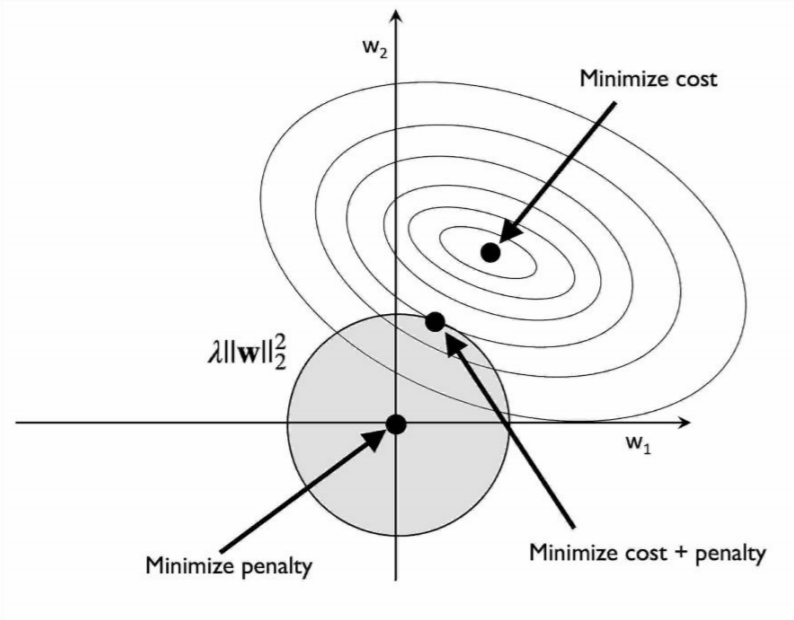

## **4.5.3 L1 규제를 사용한 희소성**

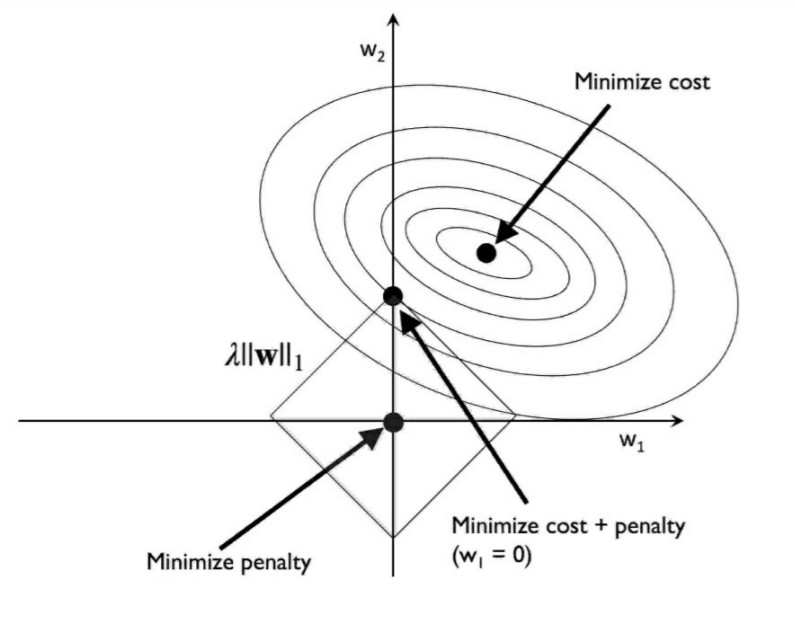

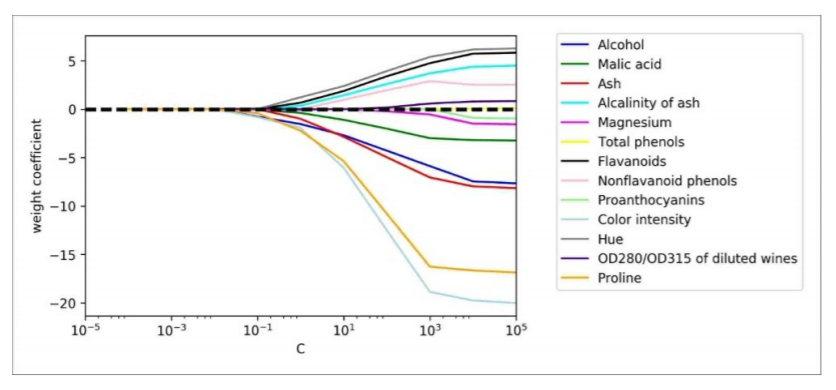

## **4.5.4 순차 특성 선택 알고리즘**